In [262]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['font.sans-serif']=['Microsoft YaHei']
matplotlib.rcParams['font.serif']=['Microsoft YaHei']

date='2020-05-19'

# import
df=pd.read_csv('./owid-covid-data.csv')
df2=df.copy(deep=True)
# clean
df=df.set_index(['date','location']).loc[date,['new_cases']].astype('int').sort_values('new_cases',ascending=False)
df=df[df['new_cases']>1000].iloc[1:]
df

,new_cases
location,
United States,21841
Brazil,13140
Russia,8926
India,4970
United Kingdom,2711
Peru,2660
Saudi Arabia,2593
Mexico,2414
Iran,2294


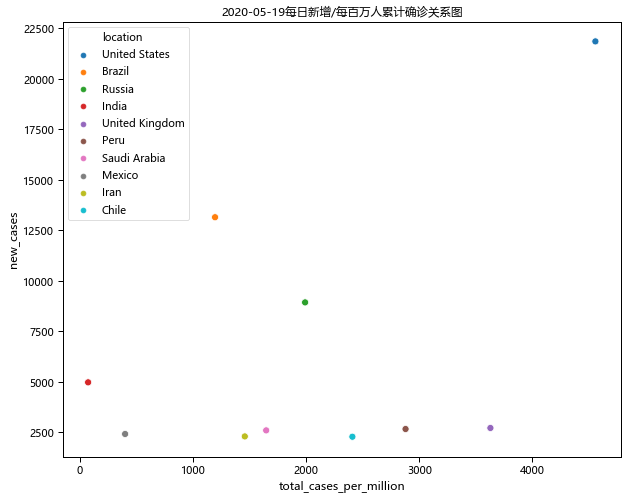

In [263]:


date1='2020-05-18'
date2='2020-05-19'

df2=df2.set_index(['date','location']).loc[[date2],['new_cases','total_cases_per_million']]



df2=df2.reset_index().set_index('location').drop(['date'],axis=1)
df2=df2.dropna().astype('int').sort_values('new_cases',ascending=False)
df2=pd.concat([df2.iloc[1:11]])
#['new_cases']].unstack()
plt.figure(figsize=(10,8))
plt.title(date2+'每日新增/每百万人累计确诊关系图')
sns.scatterplot(x=df2['total_cases_per_million'], y=df2['new_cases'],s=50, hue=df2.index)

# df2['change']=df2[date2]-df2[date1]
# df2.dropna().astype('int').sort_values('change',ascending=False).iloc[:-1]

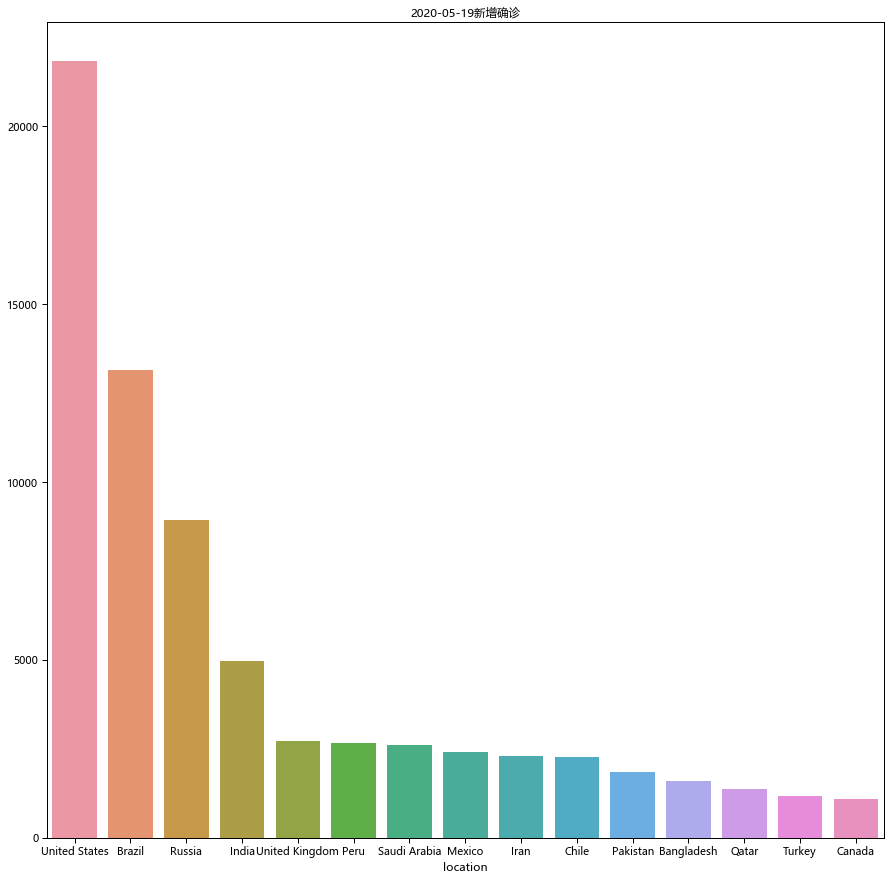

In [264]:

# plot
plt.figure(figsize=(15, 15))
plt.title(date+'新增确诊')
sns.set_context(font_scale=.3)
sns.barplot(data=df.T,label="location")